<a href="https://colab.research.google.com/github/MarvinLopezOsorio/AnaliticaPredictiva_Tareas/blob/main/Regresion%20vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

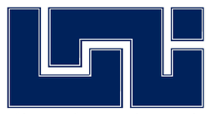

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks


[UNI-DEPEC](https://posgrado.uni.edu.ni)

**Estudiante:** 
*   Marvin López Osorio
*   Eduardo Rivera


# **Tarea Modelos Supervisados**
## **Modelo de Regresion: Quality en vino tinto**
Los set de datos procesados corresponden a datos de variantes de vino tinto. Se utilizó como fuente el [dataset en Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) que referencia al [repositorio de la University of California, Irvine](https://archive.ics.uci.edu/ml/datasets/wine+quality). En este Colab se explora la regressión de vino tinto, aplicada a la calidad o ranking. El objetivo principal de este experimento es, mediante una regresión lineal simple, predecir este ranking basado principalmente en el grado de alcohol.

###**Carga de librerias necesarias**

In [ ]:
import pandas as pd
import numpy as np

## **Desactivación de warnings**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## **Activación de Gráficos**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

## **Preprocesado**


In [ ]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

## **Configuración de matplotlib**

In [ ]:
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

###**Obtención de los datos**
Los datos originales se obtienen de un repositorio que contiene el archivo winequality-red.csv.

In [ ]:
#Referencias al repositorio de origen
repository = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'
red_wine_file = 'winequality-red.csv'
white_wine_file = 'winequality-white.csv'

#Leer datos
red_wine = pd.read_csv(repository + red_wine_file, sep=';')
#white_wine = pd.read_csv(repository + white_wine_file, sep=';')

red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# **Creación de gráfica de dispersión, entre grados de alcohol y calidad del vino**
Se evalua la relacion entre el grado alcohólico y la variable objetivo, calidad, y posterior con correlacion Pearson

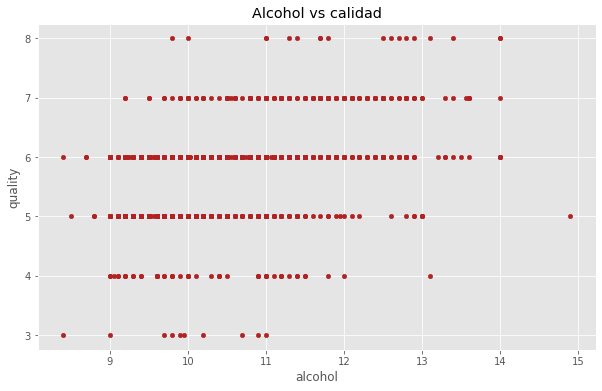

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

red_wine.plot(
    x    = 'alcohol',
    y    = 'quality',
     c    = 'firebrick',
    kind = "scatter",
    ax   = ax)

ax.set_title('Alcohol vs calidad');


La gráfica muestra una dispersión un poco rara entre las variables, pero se realiza una prueba más con el método de Pearson, para determinar si existe una correlación

In [ ]:
corr_test = pearsonr(x = red_wine['alcohol'], y =  red_wine['quality'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.47616632400113607
P-value:  2.831476974778582e-91


El valor de Correlación es muy bajo y ademas el valor P es demasiado alto, lo que indica que no vale la pena generar ningún modelo de regresion

### **Solo para prácticar la creación del modelo se seguirá el ejemplo para ver resultados e implementación del mismo**

# Separación de datos de entrenamiento y datos de prueba


In [ ]:
X = red_wine[['alcohol']]
y = red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)


# **Generación de Modelo**

In [ ]:
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

# **Reporte de modelo**

In [ ]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [1.83440741]
Coeficiente: [('alcohol', 0.3645745768967388)]
Coeficiente de determinación R^2: 0.22670587425978805


# **Prueba de modelo con la variable de prueba**


In [ ]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[5.26140843]
 [5.22495097]
 [5.88118521]]

El error (rmse) de test es: 0.6801776611157367


# **Creación del modelo utilizando Sklearn**

In [ ]:
X = red_wine[['alcohol']]
y = red_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True)

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     372.9
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           4.28e-73
Time:                        21:08:57   Log-Likelihood:                -1389.7
No. Observations:                1279   AIC:                             2783.
Df Residuals:                    1277   BIC:                             2794.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8344      0.198      9.269      0.0

# **Intervalo de confianza **

In [ ]:
modelo.conf_int(alpha=0.05)

array([[1.44613207, 2.22268275],
       [0.32753496, 0.4016142 ]])

# **Se crea la predicción, basado en el intervalo de confianza**

In [ ]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.954100,0.025950,5.903190,6.005010,4.545093,7.363107
1,5.407238,0.023317,5.361495,5.452981,3.998408,6.816068
2,5.334323,0.025447,5.284400,5.384246,3.925352,6.743295
3,5.662440,0.020115,5.622979,5.701902,4.253801,7.071080


# **Se genera la representación gráfica del modelo**

In [ ]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

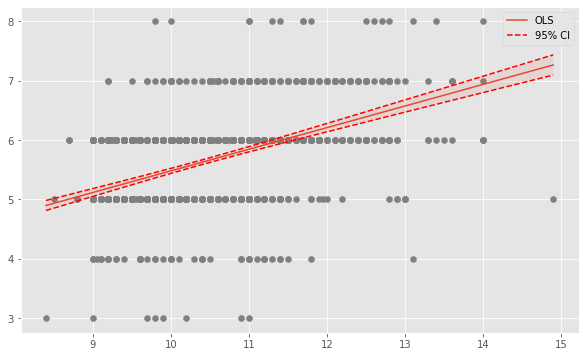

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

# Se genera el error de test

In [ ]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.6801776611157367


# **Conclusiones**

*   Básicamente el modelo puede explicar el 22.6% de la variabilidad de la calidad(variable deseada). 

*   Por otro lado el valor P-value (F-statistics) es demasiado grande para que  pueda ser tomado en cuenta como un modelo válido de regressión líneal.
Aún así el posible modelo resultante es: 
$$quality = 1.8344 + 0.774*alcohol$$
*   El error del modelo es de 68%, lo que indica que cualquier predicción puede estar alejada un 68% del resultado verdadero.

*   Es posible que el desempeño del modelo mejore si se incluyen las otras variables del dataset, pasando de una regresión linear simple a múltiple. Esto podrían ser otros pasos de seguir con la ingenieria del modelo.